In [1]:
import rasterio as rio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np

sent2_raster = rio.open("C:/Users/user/python_machine_learning/파이썬 기반 머신러닝/subset_S2B_MSIL1C_20180601_yakutsk.tif")

sent2_raster.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 512,
 'height': 512,
 'count': 13,
 'crs': CRS.from_epsg(32652),
 'transform': Affine(10.0, 0.0, 532340.0,
        0.0, -10.0, 6877540.0)}

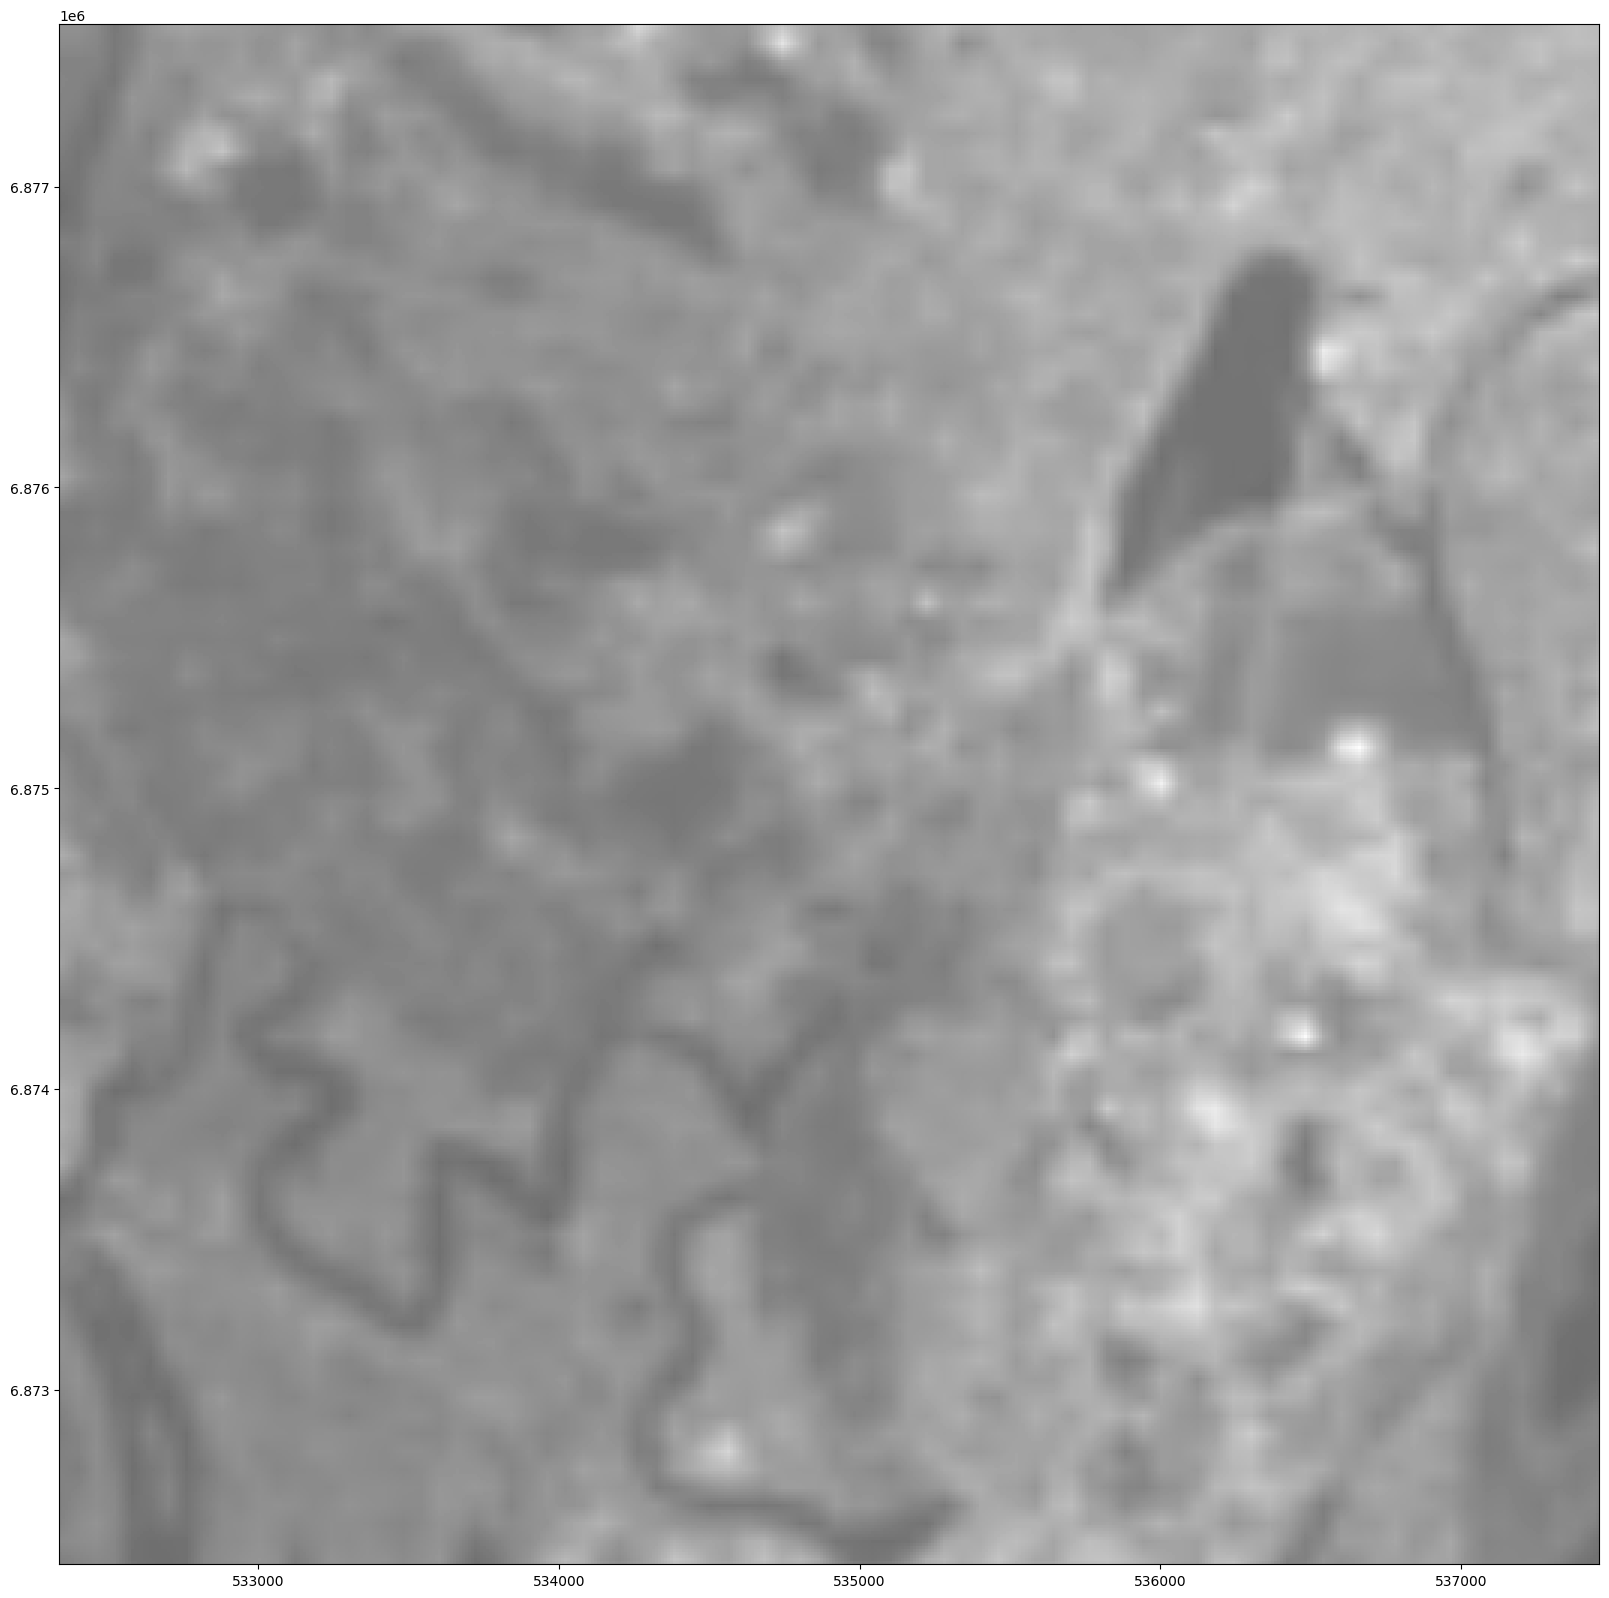

In [2]:
sent2_arr = sent2_raster.read()

vmin, vmax = np.nanpercentile(sent2_arr, (5, 95))
plt.figure(figsize=[20,20])
show(sent2_raster, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [3]:
imgxyb = np.empty((sent2_raster.height, sent2_raster.width, sent2_raster.count), sent2_raster.meta['dtype'])

for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = sent2_raster.read(band+1)

In [4]:
img1d = imgxyb[:,:,:13].reshape((imgxyb.shape[0]*imgxyb.shape[1], imgxyb.shape[2]))
img1d.shape

(262144, 13)

In [5]:
cl = cluster.KMeans(n_clusters=6)
param = cl.fit(img1d)
cl.labels_

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 5, ..., 2, 2, 2])

In [6]:
img_cl = cl.labels_
img_cl = img_cl.reshape(imgxyb[:,:,0].shape)

In [7]:
import matplotlib

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['green', 'blue', 'red', 'yellow', 'white', 'purple'])

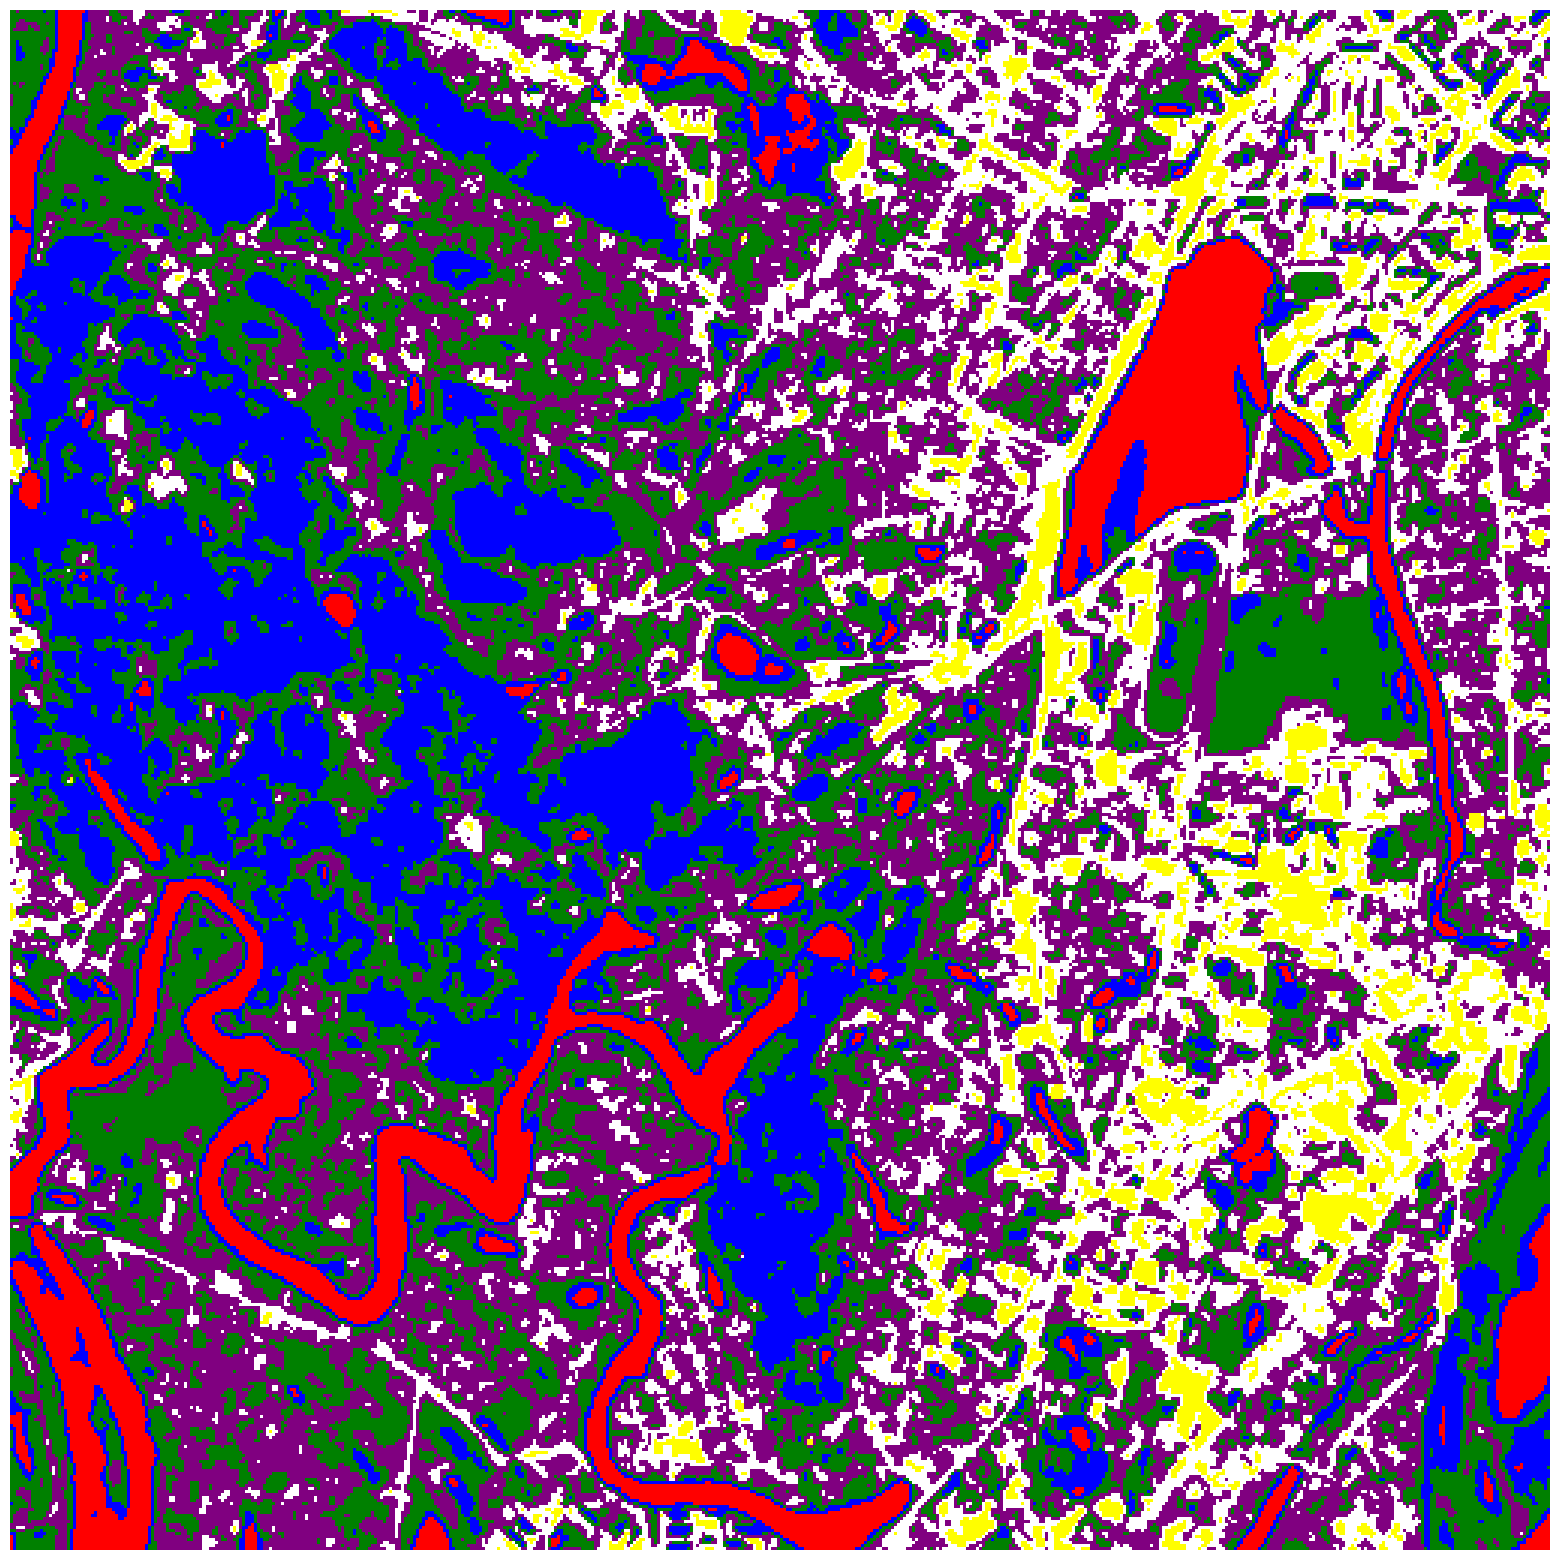

In [8]:
plt.figure(figsize=[20,20])
plt.imshow(img_cl, cmap=cmap)
plt.axis('off')
plt.savefig('sent2_KMeans_clustered.jpg', bbox_inches='tight')
plt.show()

C:\Users\user\miniconda3\envs\py\lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


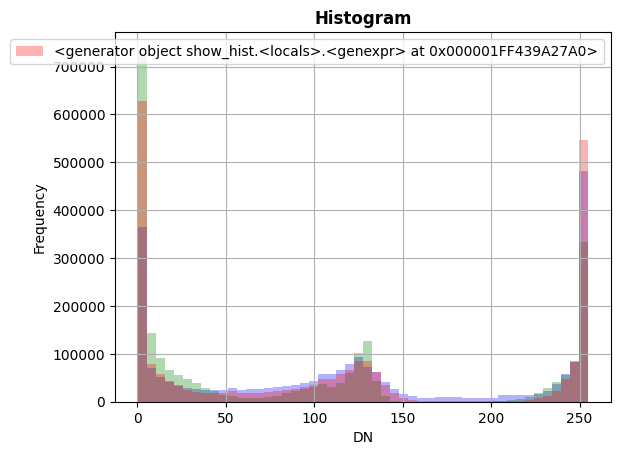

In [9]:
from rasterio import plot

el_clust = rio.open("C:/Users/user/python_machine_learning/파이썬 기반 머신러닝/sent2_KMeans_clustered.jpg")

plot.show_hist(el_clust, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title='Histogram')